# This is for Regression. Dataset is taken from kaggle.

### Importing required modules

In [308]:
#Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, LinearSVR
import os 
import graphviz
from sklearn.tree import DecisionTreeRegressor

In [309]:
#Importing data from csv file
df_reg= pd.read_csv("Life Expectancy Data.csv")
df_reg.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [310]:
#Checking shape of the data
df_reg.shape

(2938, 22)

In [311]:
#checking columns
df_reg.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [312]:
#Checking for null values
df_reg.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## We take the metadata also, so that we can combine the countries into their respective Region category

In [314]:
#Reading data from metadata
df=pd.read_csv('Country-Metadata.csv')
df.head()

,Country Name,Country Code,Region,IncomeGroup,SpecialNotes
0,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,SNA data for 2000-2011 are updated from offici...
1,Afghanistan,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"April 2013 database update: Based on IMF data,..."
3,Albania,ALB,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,NaN


### Checking the unique regions in metadata.

In [315]:
#Checking the unique regions in metadata.
df['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [316]:
df_latin=df[df['Region']=='Latin America & Caribbean']
df_latin['Country Name'].unique()

array(['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas, The',
       'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana',
       'Honduras', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'Mexico', 'Nicaragua', 'Panama',
       'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Trinidad and Tobago', 'Uruguay', 'St. Vincent and the Grenadines',
       'Venezuela, RB', 'Virgin Islands (U.S.)'], dtype=object)

In [317]:
df_southasia=df[df['Region']=='South Asia']
df_southasia['Country Name'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka',
       'Maldives', 'Nepal', 'Pakistan'], dtype=object)

In [318]:
df_sa=df[df['Region']=='Sub-Saharan Africa']
df_sa['Country Name'].unique()

array(['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde',
       'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Kenya', 'Liberia',
       'Lesotho', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'São Tomé and Principe', 'Swaziland', 'Seychelles', 'Chad', 'Togo',
       'Tanzania', 'Uganda', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [319]:
df_eca=df[df['Region']=='Europe & Central Asia']
df_eca['Country Name'].unique()

array(['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus',
       'Switzerland', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Faeroe Islands', 'United Kingdom', 'Georgia', 'Greece',
       'Greenland', 'Croatia', 'Hungary', 'Isle of Man', 'Ireland',
       'Iceland', 'Italy', 'Kazakhstan', 'Kyrgyz Republic', 'Kosovo',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Monaco',
       'Moldova', 'Macedonia, FYR', 'Montenegro', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Tajikistan', 'Turkmenistan', 'Turkey', 'Ukraine', 'Uzbekistan'],
      dtype=object)

In [320]:
df_mena=df[df['Region']=='Middle East & North Africa']
df_mena['Country Name'].unique()

array(['United Arab Emirates', 'Bahrain', 'Djibouti', 'Algeria',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Iraq', 'Israel',
       'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Malta', 'Oman',
       'West Bank and Gaza', 'Qatar', 'Saudi Arabia',
       'Syrian Arab Republic', 'Tunisia', 'Yemen, Rep.'], dtype=object)

In [321]:
df_eap=df[df['Region']=='East Asia & Pacific']
df_eap['Country Name'].unique()

array(['American Samoa', 'Australia', 'Brunei Darussalam', 'China',
       'Fiji', 'Micronesia, Fed. Sts.', 'Guam', 'Hong Kong SAR, China',
       'Indonesia', 'Japan', 'Cambodia', 'Kiribati', 'Korea, Rep.',
       'Lao PDR', 'Macao SAR, China', 'Marshall Islands', 'Myanmar',
       'Mongolia', 'Northern Mariana Islands', 'Malaysia',
       'New Caledonia', 'New Zealand', 'Philippines', 'Palau',
       'Papua New Guinea', 'Korea, Dem. Rep.', 'French Polynesia',
       'Singapore', 'Solomon Islands', 'Thailand', 'Timor-Leste', 'Tonga',
       'Tuvalu', 'Taiwan, China', 'Vietnam', 'Vanuatu', 'Samoa'],
      dtype=object)

In [322]:
df_eap=df[df['Region']=='North America']
df_eap['Country Name'].unique()

array(['Bermuda', 'Canada', 'United States'], dtype=object)

### Changing all North American countries to North America Region

In [323]:
#Changing all North American countries to North America Region
df_reg['Country'].replace(to_replace=['Bermuda', 'Canada', 'United States'],value="North America",inplace=True)

### changing all East Asia & Pacific countries to East Asia & Pacific region

In [324]:
#changing all East Asia & Pacific countries to East Asia & Pacific region
df_reg['Country'].replace(to_replace=['American Samoa', 'Australia', 'Brunei Darussalam', 'China',
       'Fiji', 'Micronesia, Fed. Sts.', 'Guam', 'Hong Kong SAR, China',
       'Indonesia', 'Japan', 'Cambodia', 'Kiribati', 'Korea, Rep.',
       'Lao PDR', 'Macao SAR, China', 'Marshall Islands', 'Myanmar',
       'Mongolia', 'Northern Mariana Islands', 'Malaysia',
       'New Caledonia', 'New Zealand', 'Philippines', 'Palau',
       'Papua New Guinea', 'Korea, Dem. Rep.', 'French Polynesia',
       'Singapore', 'Solomon Islands', 'Thailand', 'Timor-Leste', 'Tonga',
       'Tuvalu', 'Taiwan, China', 'Vietnam', 'Vanuatu', 'Samoa'],value="East Asia & Pacific",inplace=True)


### Changing Middle East & North Africa countries to Middle East & North Africa region

In [325]:
# Changing Middle East & North Africa countries to Middle East & North Africa region
df_reg['Country'].replace(to_replace=['United Arab Emirates', 'Bahrain', 'Djibouti', 'Algeria',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Iraq', 'Israel',
       'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Malta', 'Oman',
       'West Bank and Gaza', 'Qatar', 'Saudi Arabia',
       'Syrian Arab Republic', 'Tunisia', 'Yemen, Rep.'],value="Middle East & North Africa",inplace=True)

### Changing Europe & Central Asia countries to Europe & Central Asia region

In [326]:
#Changing Europe & Central Asia countries to Europe & Central Asia region
df_reg['Country'].replace(to_replace=['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus',
       'Switzerland', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Faeroe Islands', 'United Kingdom', 'Georgia', 'Greece',
       'Greenland', 'Croatia', 'Hungary', 'Isle of Man', 'Ireland',
       'Iceland', 'Italy', 'Kazakhstan', 'Kyrgyz Republic', 'Kosovo',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Monaco',
       'Moldova', 'Macedonia, FYR', 'Montenegro', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Tajikistan', 'Turkmenistan', 'Turkey', 'Ukraine', 'Uzbekistan'],value="Europe & Central Asia",inplace=True)



### Changing Sub-Saharan Africa countries to Sub-Saharan Africa region

In [327]:
#Changing Sub-Saharan Africa countries to Sub-Saharan Africa region
df_reg['Country'].replace(to_replace=['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde',
       'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Kenya', 'Liberia',
       'Lesotho', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'São Tomé and Principe', 'Swaziland', 'Seychelles', 'Chad', 'Togo',
       'Tanzania', 'Uganda', 'South Africa', 'Zambia', 'Zimbabwe'],value="Sub-Saharan Africa",inplace=True)


### Changing South Asia countries to South Asia region

In [328]:
#Changing South Asia countries to South Asia region
df_reg['Country'].replace(to_replace=['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka',
       'Maldives', 'Nepal', 'Pakistan'],value="South Asia",inplace=True)


### Changing Latin America & Caribbean countries to Latin America & Caribbean region

In [329]:
#Changing Latin America & Caribbean countries to Latin America & Caribbean region
df_reg['Country'].replace(to_replace=['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas, The',
       'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana',
       'Honduras', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'Mexico', 'Nicaragua', 'Panama',
       'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Trinidad and Tobago', 'Uruguay', 'St. Vincent and the Grenadines',
       'Venezuela, RB', 'Virgin Islands (U.S.)'],value="Latin America & Caribbean",inplace=True)


In [330]:
df_reg['Country'].value_counts()

Sub-Saharan Africa                                      688
Europe & Central Asia                                   674
Latin America & Caribbean                               417
East Asia & Pacific                                     339
Middle East & North Africa                              272
South Asia                                              128
Viet Nam                                                 16
Venezuela (Bolivarian Republic of)                       16
United States of America                                 16
Micronesia (Federated States of)                         16
United Kingdom of Great Britain and Northern Ireland     16
The former Yugoslav republic of Macedonia                16
Slovakia                                                 16
Sao Tome and Principe                                    16
Saint Vincent and the Grenadines                         16
Saint Lucia                                              16
Republic of Moldova                     

### Placing countries with nmaing errors into their respective regions

In [331]:
#Placing countries with nmaing errors into their respective regions
df_reg['Country'].replace(to_replace=["United States of America","Saint Lucia"],value="North America",inplace=True)
df_reg['Country'].replace(to_replace=["The former Yugoslav republic of Macedonia","Kyrgyzstan","Slovakia","Czechia","United Kingdom of Great Britain and Northern Ireland","Republic of Moldova"],value="Europe & Central Asia",inplace=True)
df_reg['Country'].replace(to_replace=["Republic of Korea","Democratic People's Republic of Korea","Viet Nam","Micronesia (Federated States of)","Lao People's Democratic Republic","Cook Islands","Nauru","Niue"],value="East Asia & Pacific",inplace=True)
df_reg['Country'].replace(to_replace=["Iran","Egypt","Yemen","Iran (Islamic Republic of)"],value="Middle East & North Africa",inplace=True)
df_reg['Country'].replace(to_replace=["Gambia","Congo","Democratic Republic of the Congo","United Republic of Tanzania","Sao Tome and Principe"],value="Sub-Saharan Africa",inplace=True)
df_reg['Country'].replace(to_replace=["Bahamas","Bolivia","Bolivia (Plurinational State of)","Venezuela (Bolivarian Republic of)","Saint Vincent and the Grenadines","Saint Kitts and Nevis"],value="Latin America & Caribbean",inplace=True)

In [332]:
df_reg['Country'].value_counts()

Europe & Central Asia         770
Sub-Saharan Africa            768
Latin America & Caribbean     482
East Asia & Pacific           422
Middle East & North Africa    320
South Asia                    128
North America                  48
Name: Country, dtype: int64

### counts of countries in the Region

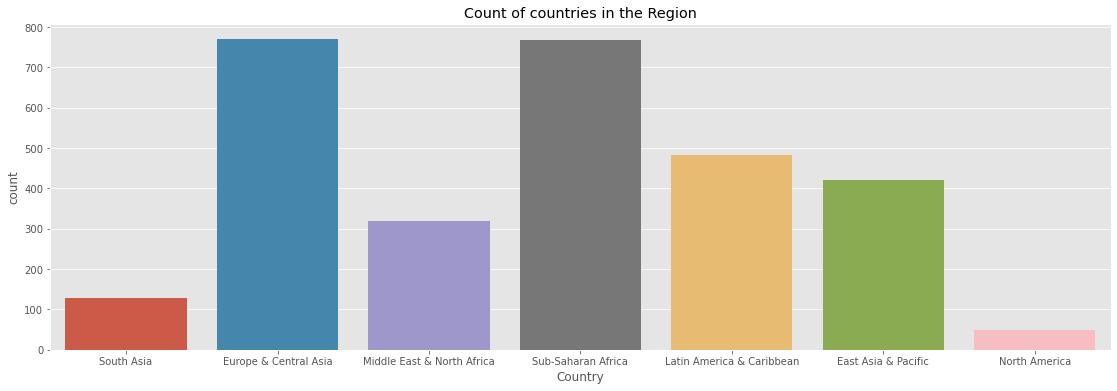

In [333]:
plt.figure(figsize=(19,6))
sns.countplot(x='Country',data=df_reg)
plt.title('Count of countries in the Region')
plt.show()

In [334]:
df_reg.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Checking null values for Status column

In [335]:
#Chacking null values for Status column
df_reg['Status'].isna().sum()

0

### Checking different types of values of Status

In [336]:
#Checking different types of values of Status
df_reg['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

### Counting the values in Status Column

In [337]:
#Counting the values in Status Column
df_reg['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

### Visulaization of Status Column

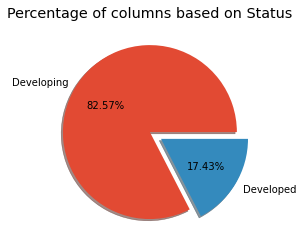

In [338]:
#Visulaization of Status Column
explode =[0.0,0.15]
plt.pie(df_reg['Status'].value_counts(), labels=['Developing', 'Developed'], explode=explode,shadow=0.3,autopct='%1.2f%%')
plt.title('Percentage of columns based on Status')
plt.show()

### Changing developed to 0 and developing to 1

In [339]:
#Changing developed to 0 and developing to 1
df_reg['Status'] = df_reg['Status'].map({'Developed':0, 'Developing':1}).astype(int)
df_reg['Status'].value_counts()

1    2426
0     512
Name: Status, dtype: int64

### Infant DEaths

In [340]:
#Infant DEaths
df_reg['infant deaths'].isna().sum()

0

In [341]:
df_reg['infant deaths'].value_counts()

0      848
1      342
2      203
3      175
4       96
      ... 
171      1
201      1
215      1
253      1
110      1
Name: infant deaths, Length: 209, dtype: int64

In [342]:
#Alcohol
df_reg['Alcohol'].isna().sum()

194

### Alcohol column visulization

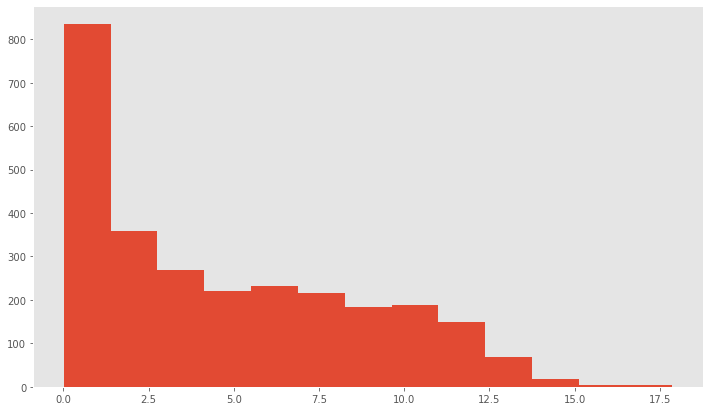

In [343]:
# Alcohol column visulization
plt.figure(figsize=(12,7))
plt.hist(df_reg['Alcohol'],bins='sturges')
plt.grid()
plt.show()

### We see that the plot is right skewed so we are imputing it with median

In [344]:
#We see that the plot is right skewed so we are imputing it with median
df_reg['Alcohol'].replace(to_replace=np.NaN,value=df_reg['Alcohol'].median(),inplace=True)
df_reg['Alcohol'].isna().sum()

0

### Hepatitis B

In [345]:
#Hepatitis B
df_reg['Hepatitis B'].isna().sum()

553

### Hepatatis B column visulization

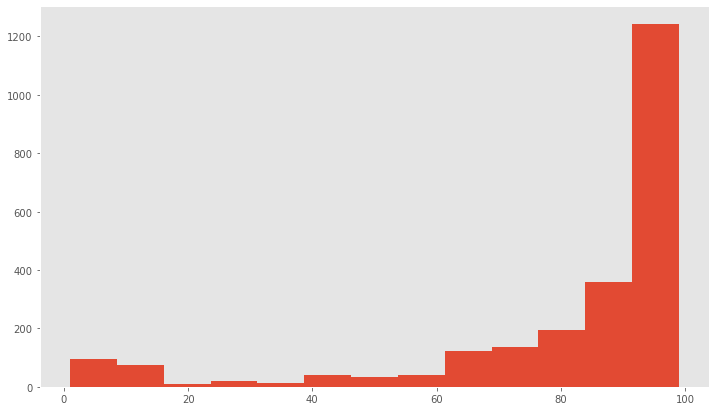

In [346]:
# Hepatatis B column visulization
plt.figure(figsize=(12,7))
plt.hist(df_reg['Hepatitis B'],bins='sturges')
plt.grid()
plt.show()

### The data is left skewed , so we are imputing it with median

In [347]:
#The data is left skewed , so we are imputing it with median
df_reg['Hepatitis B'].replace(to_replace=np.NaN,value=df_reg['Hepatitis B'].median(),inplace=True)
df_reg['Hepatitis B'].isna().sum()

0

### BMI 

In [348]:
# BMI 
df_reg[' BMI '].isna().sum()

34

### BMI column visulization

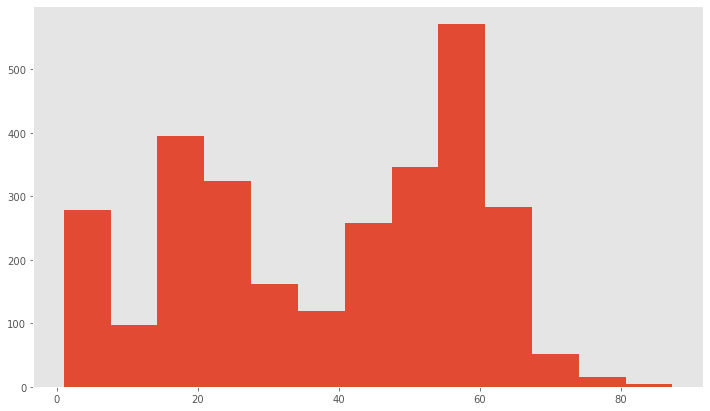

In [349]:
# BMI column visulization
plt.figure(figsize=(12,7))
plt.hist(df_reg[' BMI '],bins='sturges')
plt.grid()
plt.show()

### It looks like a double shaped or bi modal graph

In [350]:
df_reg[' BMI '].replace(to_replace=np.NaN,value=df_reg[' BMI '].median(),inplace=True)
df_reg[' BMI '].isna().sum() 

0

### Checking missing values in Polio Column

In [351]:
#Checking missing values in Polio Column
df_reg['Polio'].isna().sum()

19

### Visulization of Polio column

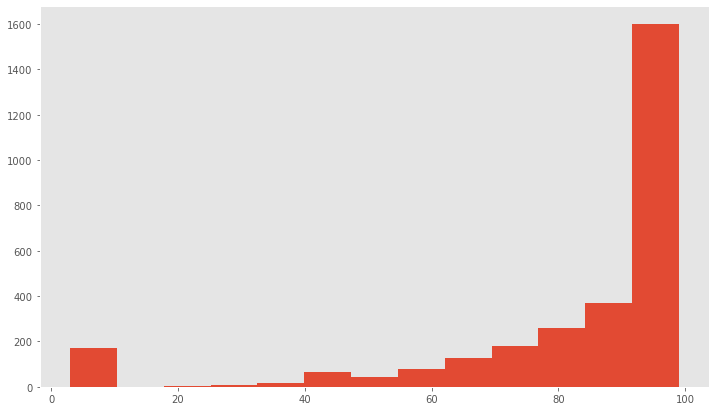

In [352]:
#Visulization of Polio column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Polio'],bins='sturges')
plt.grid()
plt.show()

### The curve is left skewed, so we will replce missing values with median values

In [353]:
#The curve is left skewed, so we will replce missing values with median values
df_reg['Polio'].replace(to_replace=np.NaN,value=df_reg['Polio'].median(),inplace=True)
df_reg['Polio'].isna().sum() 

0

### Total expenditure Column

In [354]:
#Total expenditure Column
df_reg['Total expenditure'].isna().sum()

226

### Visulaization of Total expenditure Column

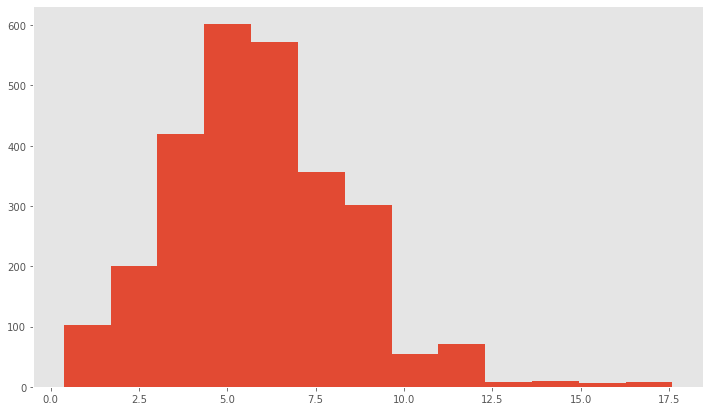

In [355]:
#Visulaization of Total expenditure Column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Total expenditure'],bins='sturges')
plt.grid()
plt.show()

### The histogram is almost a normal curve, so we use mean to replce the missing values

In [356]:
#The histogram is almost a normal curve, so we use mean to replce the missing values
df_reg['Total expenditure'].replace(to_replace=np.NaN,value=df_reg['Total expenditure'].mean(),inplace=True)
df_reg['Total expenditure'].isna().sum()

0

### Diphtheria Column

In [357]:
#Diphtheria Column
df_reg['Diphtheria '].isna().sum()

19

### Visualization of Diptheria Column

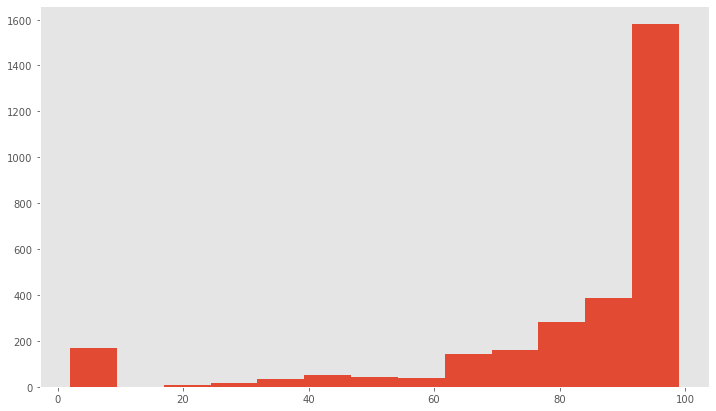

In [358]:
#Visulaization of Diptheria Column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Diphtheria '],bins='sturges')
plt.grid()
plt.show()

### The histogram is left skewed, so we will be using median to replace the values.

In [359]:
#The histogram is left skewed, so we will be using median to replace the values.
df_reg['Diphtheria '].replace(to_replace=np.NaN,value=df_reg['Diphtheria '].median(),inplace=True)
df_reg['Diphtheria '].isna().sum()

0

### HIV/AIDS; There are no missing values in  HIV/AIDS, so no replcing is needed

In [360]:
# HIV/AIDS; There are no missing values in  HIV/AIDS, so no replcing is needed
df_reg[' HIV/AIDS'].isna().sum()

0

In [361]:
#Checking for missing values in GDP Column
df_reg['GDP'].isna().sum()

448

### Visulization of in GDP Column

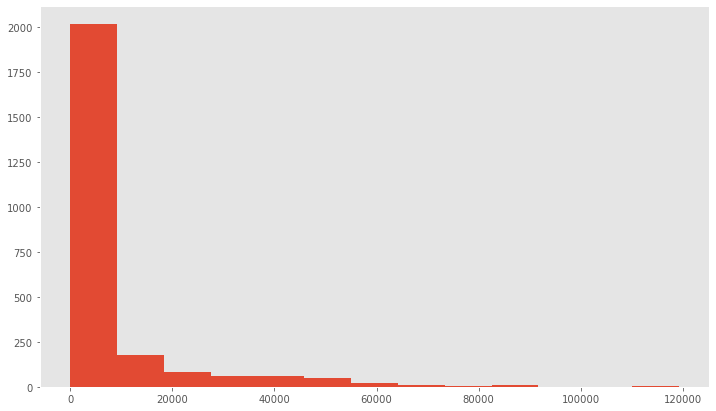

In [362]:
#Visulization of in GDP Column
plt.figure(figsize=(12,7))
plt.hist(df_reg['GDP'],bins='sturges')
plt.grid()
plt.show()

### The graph is right skewed, so we use median to replce the null values

In [363]:
#The graph is right skewed, so we use median to replce the null values
df_reg['GDP'].replace(to_replace=np.NaN,value=df_reg['GDP'].median(),inplace=True)
df_reg['GDP'].isna().sum()

0

### Checking for missing poulation column

In [364]:
# Chcking for missing poulation column
df_reg['Population'].isna().sum()

652

### Visualization of poulation column

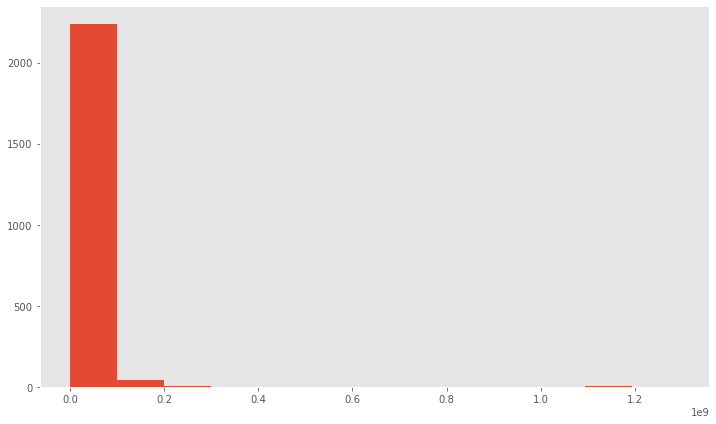

In [365]:
#Visualization of poulation column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Population'],bins='sturges')
plt.grid()
plt.show()

### The graph is right skewed , so we use median to replace the missing values

In [366]:
#The graph is right skewed , so we use median to replace the missing values
df_reg['Population'].replace(to_replace=np.NaN,value=df_reg['Population'].median(),inplace=True)
df_reg['Population'].isna().sum()

0

### Checking for missing values in 'thinness  1-19 years' column

In [367]:
# Chcking for missing values in 'thinness  1-19 years' column
df_reg[' thinness  1-19 years'].isna().sum()

34

### Visulaization of 'thinness  1-19 years' column

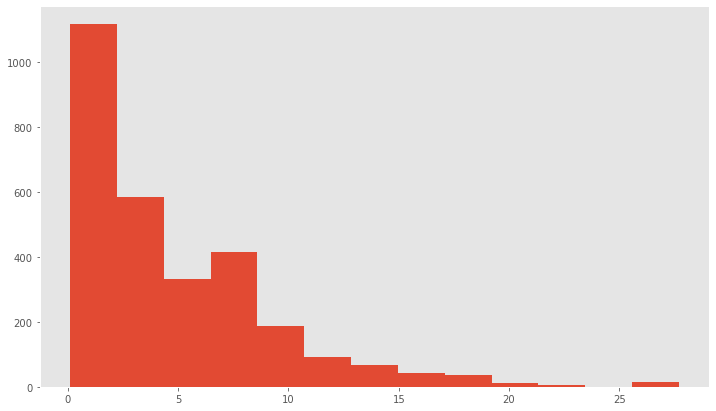

In [368]:
#Visulaization of 'thinness  1-19 years' column
plt.figure(figsize=(12,7))
plt.hist(df_reg[' thinness  1-19 years'],bins='sturges')
plt.grid()
plt.show()

### data is right skewed , so we are replcing misiing values with median

In [369]:
#data is right skewed , so we are replcing misiing values with median
df_reg[' thinness  1-19 years'].replace(to_replace=np.NaN,value=df_reg[' thinness  1-19 years'].median(),inplace=True)
df_reg[' thinness  1-19 years'].isna().sum()

0

### Checking for missing values in ' thinness 5-9 years' column

In [370]:
# Chcking for missing values in ' thinness 5-9 years' column
df_reg[' thinness 5-9 years'].isna().sum()

34

### Visulization of ' thinness 5-9 years' column

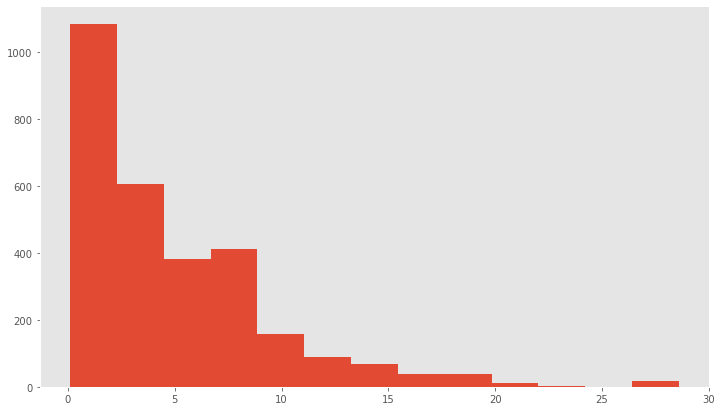

In [371]:
#Visulization of ' thinness 5-9 years' column
plt.figure(figsize=(12,7))
plt.hist(df_reg[' thinness 5-9 years'],bins='sturges')
plt.grid()
plt.show()

### Data is right skewed, so we are replacing missing values with median

In [372]:
#Data is right skewed, so we are replacing missing values with median
df_reg[' thinness 5-9 years'].replace(to_replace=np.NaN,value=df_reg[' thinness  1-19 years'].median(),inplace=True)
df_reg[' thinness 5-9 years'].isna().sum()

0

### Checking for missing values Income composition of resources Column

In [373]:
#Checking for missing values Income composition of resources Column
df_reg['Income composition of resources'].isna().sum()

167

### Visualization of Income composition of resources Column

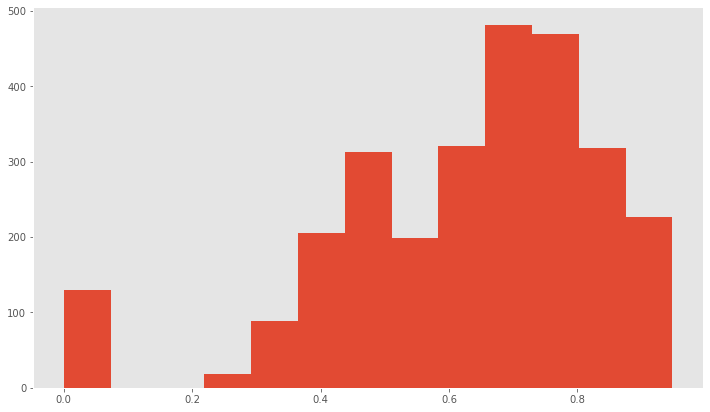

In [374]:
#Visualization of Income composition of resources Column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Income composition of resources'],bins='sturges')
plt.grid()
plt.show()

### Histogram is left skewed, so we are replcing missing values with median values

In [375]:
#Histogram is left skewed, so we are replcing missing values with median values
df_reg['Income composition of resources'].replace(to_replace=np.NaN,value=df_reg['Income composition of resources'].median(),inplace=True)
df_reg['Income composition of resources'].isna().sum()

0

### Checking for missing values in Schooling Column

In [376]:
#Checking for missing values in Schooling Column
df_reg['Schooling'].isna().sum()

163

### Visualization of Schooling Column

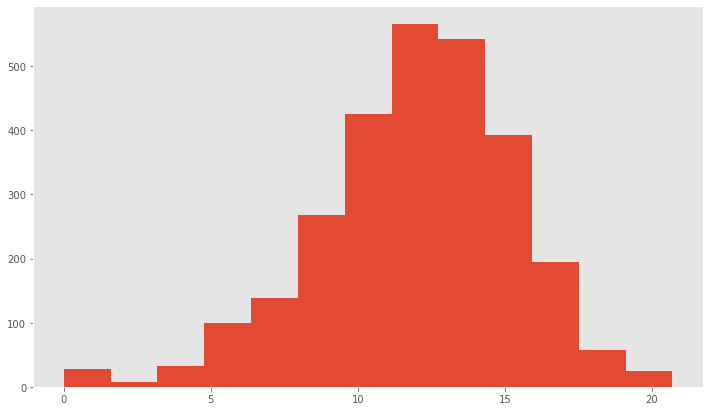

In [377]:
#Visualization of Schooling Column
plt.figure(figsize=(12,7))
plt.hist(df_reg['Schooling'],bins='sturges')
plt.grid()
plt.show()

### Slightly skewed and since mean and median are nearly same we are using median to replace the missing values with median

In [378]:
#Slightly skewed and since mean and median are nearly same we are using median to replace the missing values with median
df_reg['Schooling'].replace(to_replace=np.NaN,value=df_reg['Schooling'].median(),inplace=True)
df_reg['Schooling'].isna().sum()

0

### Checking for missing values after making all the required modifications; We see that the rows which have Life Expectancy that have Adult Mortality is blank, so we drop those 10 rows.

In [379]:
#Checking for missing values after making all the required modifications; We see that the rows which have Life Expectancy that have Adult Mortality is blank, so we drop those 10 rows.
df_reg.isna().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64

### Dropping the rows

In [380]:
#Dropping the rows
df_reg=df_reg.dropna()

In [381]:
df_reg.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### We use one hot encoding, for Country 

In [382]:
#We use one hot encoding, for Country 
df_reg['Country'] = df_reg['Country'].astype(object)
cols = pd.get_dummies(df_reg['Country'], prefix= 'Country')
df_reg[cols.columns] = cols
df_reg.drop('Country', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                2928 non-null   int64  
 1   Status                              2928 non-null   int32  
 2   Life expectancy                     2928 non-null   float64
 3   Adult Mortality                     2928 non-null   float64
 4   infant deaths                       2928 non-null   int64  
 5   Alcohol                             2928 non-null   float64
 6   percentage expenditure              2928 non-null   float64
 7   Hepatitis B                         2928 non-null   float64
 8   Measles                             2928 non-null   int64  
 9    BMI                                2928 non-null   float64
 10  under-five deaths                   2928 non-null   int64  
 11  Polio                               2928 no

In [383]:
df_reg.shape

(2928, 28)

#  K neighbours regressors

# Standard Scaler
$$x_{new} = \frac{x - mean}{std}$$


### We take the 'STATUS' as the target column and est all as the feature columns

In [384]:
#We take the 'STATUS' as the target column and est all as the feature columns
X = df_reg.drop('Life expectancy ', axis = 1)
y = df_reg['Life expectancy ']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

#using min max scaler we scale the values and then transform the values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### defining the parameters

In [385]:
# defining the parameters

param_dist={ 
    'weights': ['uniform'],
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12],
    "metric":["minkowski", "manhattan","euclidean","cosine"]
}

### Grid Search

In [386]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn_reg, param_grid=param_dist, cv=10, n_jobs=-1)


### fitting the values

In [387]:
# fitting the values
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=2), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform']})

### finding the best estimator

In [388]:
#finding the best estimator
grid.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=4)

### hyper parameter tunning

In [389]:
#hyper parameter tunning
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

### best score

In [390]:
grid.best_score_

0.9355885722717063

### now fitting the model with best parameters

In [391]:
# now fitting the model with best parameters
knn = KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='uniform')
knn.fit(X_train,y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9665
Test score: 0.9306


### visualising it using graph

Text(0, 0.5, 'MSE')

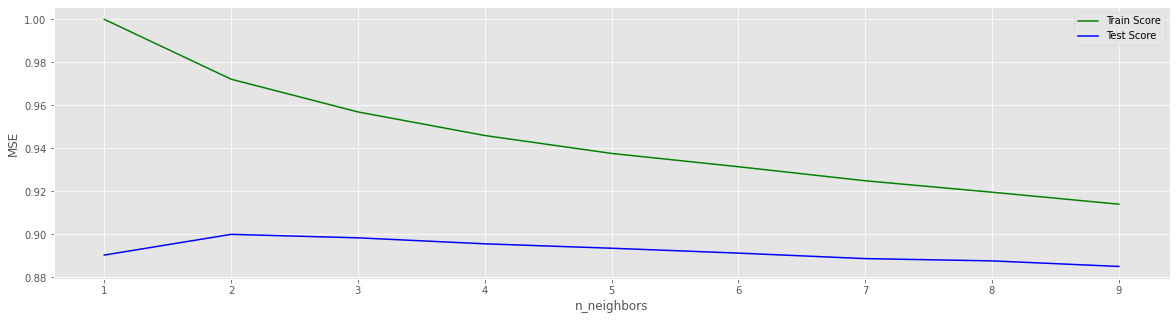

In [392]:
# visualising it using graph
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

In [393]:
np.where(X.columns == 'Life expectancy ')

(array([], dtype=int64),)

Text(0, 0.5, 'Life expectancy ')

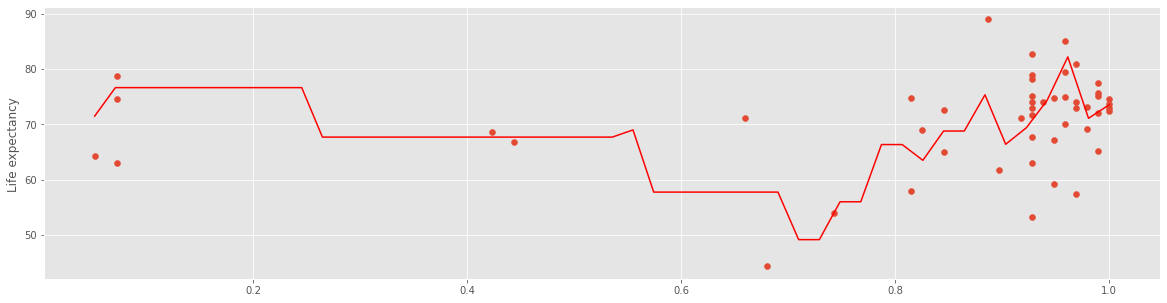

In [470]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.ylabel('Life expectancy ')

# Linear regression using the Normal Equation

### splitting the data into train and test and transforming using min max scalar

In [395]:
# splitting the data into train and test and transforming using min max scalar

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### fitting the model and finding the test and training score

In [396]:
# fitting the model and finding the test and training score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lreg.score(X_test, y_test)))

Train score: 0.8524
Test score: 0.8521


# r2-score
$$r2 = 1 - \frac{SS_{res}}{SS_{total}}$$
$$SS_{res} = \sum_i (y_i - y_{mean})^2$$
$$SS_{total} = \sum_i (y_i - \hat{y}_i)^2$$
where $y_{mean}$ is the average of all target values, and $\hat{y}_i$ is the prediction of instance $i$. $y_i$ is the actual target value of instance $i$. 

### plotting r square in the graph below

Text(0.5, 0, 'RM')

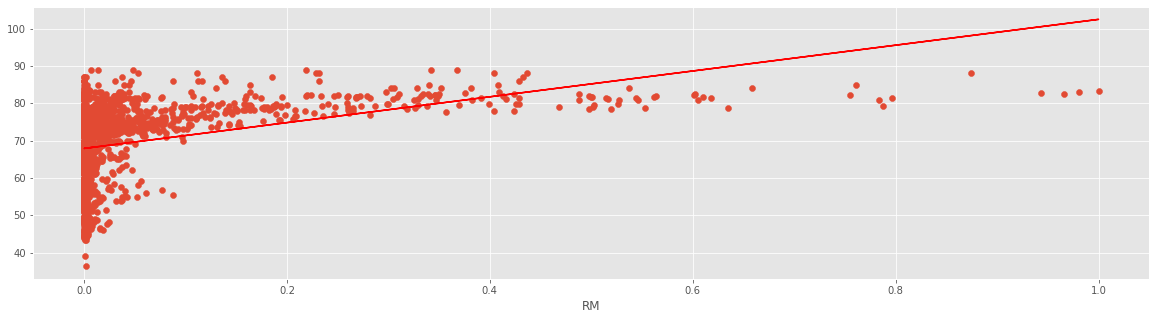

In [397]:
# plotting r square in the graph below

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Ridge

### splitting the data into train and test and transforming using min max scalar

In [398]:
# splitting the data into train and test and transforming using min max scalar

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [399]:
# defining the model and fitting it
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

### putting the parameters for GridSearchCV

In [400]:
# putting the parameters for GridSearchCV
param_dist={
    "solver":["svd","cholesky","lsqr","sag","saga","lbfgs"],
    "alpha":[0.01, 0.1, 1, 10, 100]
}

In [401]:
grid=GridSearchCV(ridge, param_grid=param_dist, cv=5, n_jobs=-1)

In [402]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga',
                                    'lbfgs']})

### best estimator using grid search

In [403]:
# best estimator using grid search
grid.best_estimator_

Ridge(alpha=0.01, solver='svd')

### Taking the best score using grid method

In [404]:
#Taking the best score using grid method
grid.best_score_

0.8464869366544219

### best paramaters

In [405]:
# best paramas
grid.best_params_

{'alpha': 0.01, 'solver': 'svd'}

### now fitting the model with best parameters

In [406]:
# now fitting the model with best parameters
ridge = Ridge(alpha=0.01, solver='svd')
ridge.fit(X_train,y_train)

print('Train score: {:.4f}'.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8523
Test score: 0.8519


### visualising Train and Test split

In [407]:

train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

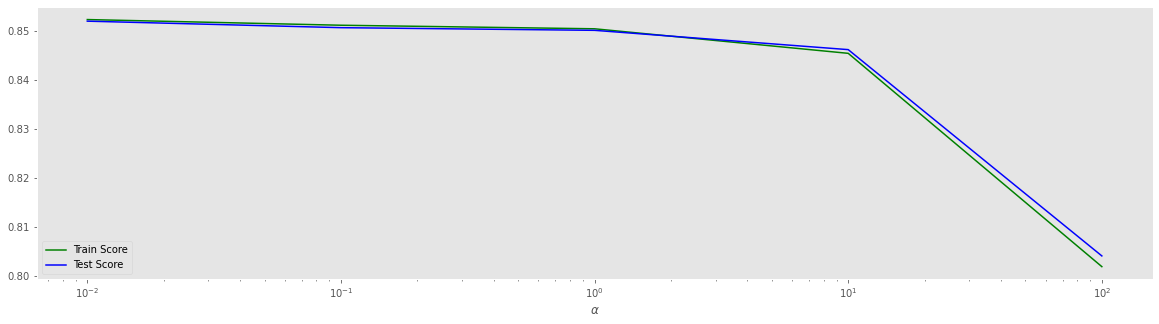

In [408]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [409]:
print(train_score_list)
print(test_score_list)

[0.8522520944917519, 0.8510962158688606, 0.8503725738356513, 0.8453769769431495, 0.8019611403401906]
[0.8519248684827772, 0.8506004305143753, 0.8500584584142317, 0.8461322632146718, 0.8041421245624016]


In [410]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8523
Test score: 0.8519


In [411]:
ridge.coef_

array([ 1.28769160e+00, -2.80987665e+00, -1.11874857e+01,  6.25812565e+01,
        8.87853347e-01,  2.38170121e+00, -1.18540949e+00, -2.36798285e+00,
        6.81906518e-01, -6.77414498e+01,  2.66922417e+00,  7.63039824e-01,
        3.15972573e+00, -1.70997468e+01,  4.32961034e+00,  1.07377141e+00,
       -1.38714022e+00, -7.95750601e-01,  3.88802134e+00,  1.10714199e+01,
        1.63481787e-02, -2.85365939e-01,  1.35272393e+00,  8.75256103e-01,
        2.60439290e+00,  8.18850622e-01, -5.38220579e+00])

In [412]:
ridge.intercept_

61.51259806968311

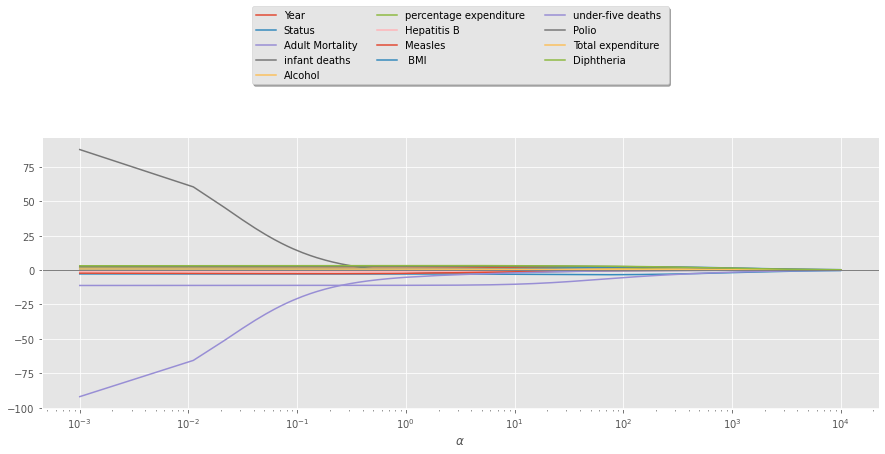

In [413]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso 

### splitting the data into train and test and transforming using min max scalar

In [414]:
# splitting the data into train and test and transforming using min max scalar

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [415]:

lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

### Using Grid Search and defining different parameters

In [416]:
#Using Grid Search and defining different parameters
param_dist={
    "alpha":[0.01, 0.1, 1, 10, 100]
}

In [417]:
grid=GridSearchCV(lasso, param_grid=param_dist, cv=5, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

### finding the best estimator

In [418]:
#finding the best estimator
grid.best_estimator_

Lasso(alpha=0.01)

### Taking the best score using grid method

In [419]:
#Taking the best score using grid method
grid.best_score_

0.8439416572701735

### best paramaters

In [420]:
#best paramaters
grid.best_params_

{'alpha': 0.01}

### now fitting the model with best parameters

In [421]:
# now fitting the model with best parameters
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

print('Train score: {:.4f}'.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.1199
Test score: 0.1204


### visualising train and test scores on different range

In [422]:

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

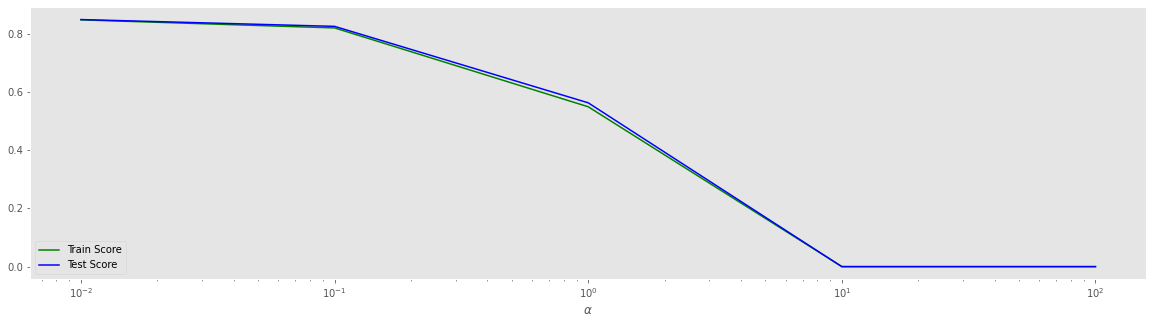

In [423]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

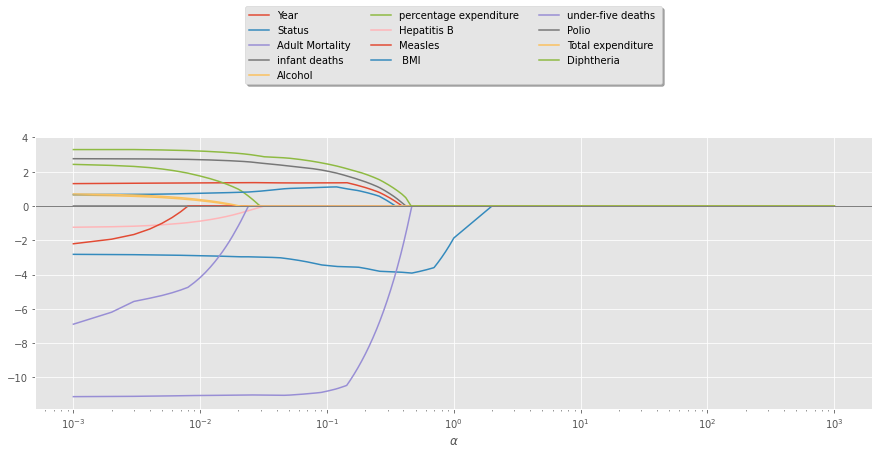

In [424]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [425]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
dict(zip(X.columns, lasso.coef_))

{'Year': 1.346923193750202,
 'Status': -3.4668644014257453,
 'Adult Mortality': -10.799615840018408,
 'infant deaths': -0.0,
 'Alcohol': 0.0,
 'percentage expenditure': 0.0,
 'Hepatitis B': 0.0,
 'Measles ': -0.0,
 ' BMI ': 1.0994271944354135,
 'under-five deaths ': -0.0,
 'Polio': 2.039055037055607,
 'Total expenditure': 0.0,
 'Diphtheria ': 2.454736269429669,
 ' HIV/AIDS': -4.894253475433084,
 'GDP': 0.0,
 'Population': -0.0,
 ' thinness  1-19 years': -0.0,
 ' thinness 5-9 years': -0.42782776257472677,
 'Income composition of resources': 5.832527442896018,
 'Schooling': 6.882638040512357,
 'Country_East Asia & Pacific': -0.0,
 'Country_Europe & Central Asia': 0.0,
 'Country_Latin America & Caribbean': 0.5309388051159708,
 'Country_Middle East & North Africa': 0.0,
 'Country_North America': 0.0,
 'Country_South Asia': -0.0,
 'Country_Sub-Saharan Africa': -8.022272056874776}

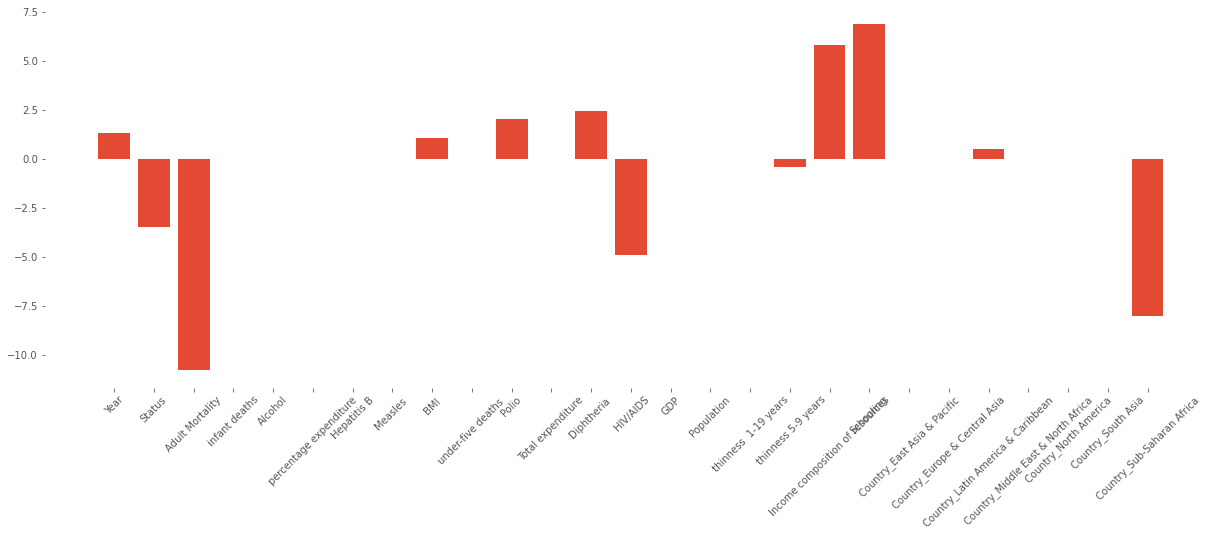

In [426]:
plt.figure(figsize = (21,7))
plt.style.use('ggplot')
plt.bar(range(27), lasso.coef_)
plt.box(False)
plt.xticks(range(27), X.columns, rotation = 45)
plt.grid()

# Polynomial regression

### splitting the data into train and test and transforming using min max scalar

In [427]:
# splitting the data into train and test and transforming using min max scalar

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### train and test scores with degree 2 

In [428]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print(poly_reg.score(X_train_poly, y_train))
print(poly_reg.score(X_test_poly, y_test))

0.9529279465799357
0.8454312648149785


### Train and test scores with degree 3. The test score is coming in negative. Therefore, we should not do further analysis with other degrees.

In [429]:
poly_three = PolynomialFeatures(degree = 3)
X_train_poly_three = poly_three.fit_transform(X_train)
X_test_poly_three = poly_three.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_three, y_train)

print(poly_reg.score(X_train_poly_three, y_train))
print(poly_reg.score(X_test_poly_three, y_test))

1.0
-3097.0131161393574


### We take n=2 for polynomial regression as n=3 is giving test result of negative which is not feasible

# LinearSVR

### Installing Pip

In [431]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


### Simple SVR , it by default takes rbf

In [433]:
# Simple SVR , it by default takes rbf
clf_rbf = SVR()
clf_rbf.fit(X_train,y_train)

print('Train score: {:.4f}'.format(clf_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf_rbf.score(X_test, y_test)))

Train score: 0.8669
Test score: 0.8648


# Poly SVR with kernels (rbf,poly and linear)

### for rbf Fine tuning using grid search

In [434]:
# for rbf Fine tuning using grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(clf_rbf, param_grid, cv=5, return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


### Finding Best Parameters and Best Cross-validation Score

In [435]:
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.93


### Now fitting the model with best parameters

In [436]:
# now fitting the model with best parameters
clf_rbf = SVR(kernel='rbf',C=100, gamma=1)
clf_rbf.fit(X_train,y_train)

print('Train score: {:.4f}'.format(clf_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf_rbf.score(X_test, y_test)))

Train score: 0.9783
Test score: 0.9344


### For SVR poly. Splitting into training and test dataset and then finding the Training and Test score

In [464]:
# for SVR poly
df_reg_1= df_reg.sample(n=700)
X = df_reg_1.drop('Life expectancy ', axis = 1)
y = df_reg_1['Life expectancy ']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

#using min max scaler we scale the values and then transform the values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svr_poly.score(X_test, y_test)))

Train score: 0.8487
Test score: 0.8341


### SVR Poly after fine tuning

In [465]:
#SVR Poly after fine tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100],
              'gamma': [0.001, 0.01, 0.1, 1, 10,100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search_1 = GridSearchCV(svr_poly, param_grid, cv=5, return_train_score=True)
grid_search_1.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_1.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001, 'gamma': 10}
Best cross-validation score: 0.87


### Finding best parameters

In [471]:
grid_search_1 = GridSearchCV(svr_poly, param_grid, cv=5, return_train_score=True)
grid_search_1.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_1.best_score_))

Best parameters: {'C': 0.001, 'gamma': 10}
Best cross-validation score: 0.87


### Now fitting the model with best parameters

In [472]:
# now fitting the model with best parameters
clf_poly = SVR(kernel='poly',C=0.001, gamma=10)
clf_poly.fit(X_train,y_train)

print('Train score: {:.4f}'.format(clf_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf_poly.score(X_test, y_test)))

Train score: 0.9494
Test score: 0.8971


### SVR -Linear

In [473]:
# splitting the data into train and test and transforming using min max scaler
X = df_reg.drop('Life expectancy ', axis = 1)
y = df_reg['Life expectancy ']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#SVR -Linear
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svr_linear.score(X_test, y_test)))

Train score: 0.8429
Test score: 0.8463


### SVR Linear after fine tuning

In [474]:
#SVR Linear after fine tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search_2 = GridSearchCV(svr_linear, param_grid, cv=5, return_train_score=True)
grid_search_2.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_2.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_2.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.84


### Now fitting the model with best parameters

In [475]:
# now fitting the model with best parameters
svr_linear_1 = SVR(kernel='linear',C=100, gamma=.001)
svr_linear_1.fit(X_train,y_train)

print('Train score: {:.4f}'.format(svr_linear_1.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svr_linear_1.score(X_test, y_test)))

Train score: 0.8459
Test score: 0.8488


# Decision Tree Regressor

### Splitting the data and then putting GridSearchCV

In [440]:
X = df_reg.drop('Life expectancy ', axis = 1)
y = df_reg['Life expectancy ']

# hyper parameter tunning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Visualisation of Target Variable with default leaves

Text(0, 0.5, 'Life Expectancy')

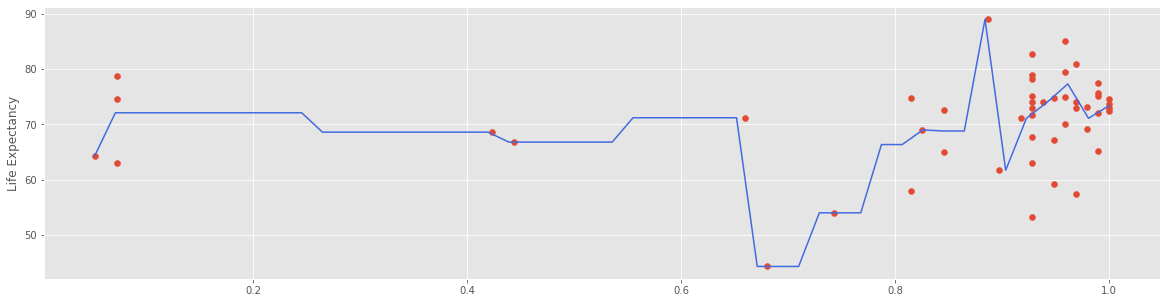

In [468]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.ylabel('Life Expectancy')

### Visualisation of Target Variable with 10 leaves

Text(0, 0.5, 'Life Expectancy')

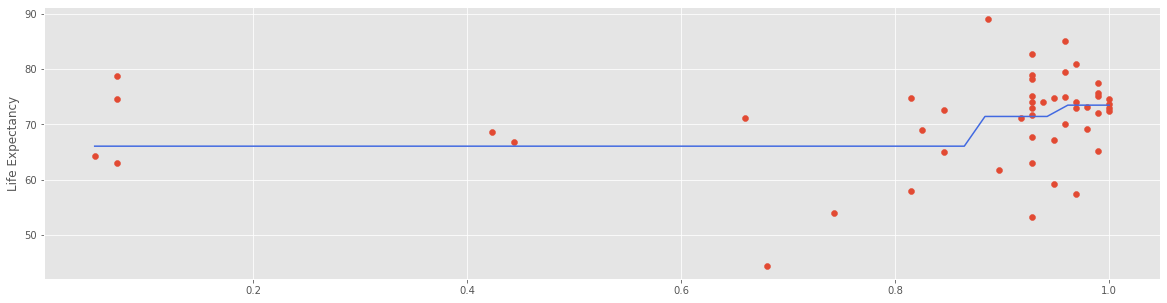

In [469]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor(min_samples_leaf=10)
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.ylabel('Life Expectancy')

### Accuracy on Training and Test set

In [443]:
dtree = DecisionTreeRegressor(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.737
Accuracy on test set: 0.731


### Grid Search CV

In [444]:
param_dist={
    "criterion":["squared_error", "mse", "absolute_error", "mae"],
    "max_depth":[1,2,3,4,5,6,7]
}

grid=GridSearchCV(dtree, param_grid=param_dist, cv=10, n_jobs=-1)

In [446]:
from warnings import simplefilter
simplefilter(action='ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

### Best estimator

In [447]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=7, random_state=0)

### Best Score

In [448]:
grid.best_score_

0.9167648635573103

### Best Parameters

In [449]:
#hyper parameter tunning
grid.best_params_

{'criterion': 'mse', 'max_depth': 7}

### Putting best parameters to find out the training and test scores

In [450]:
dtree = DecisionTreeRegressor(max_depth=7, criterion = 'mse')
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.954
Accuracy on test set: 0.911


### Visualising the Decision Tree

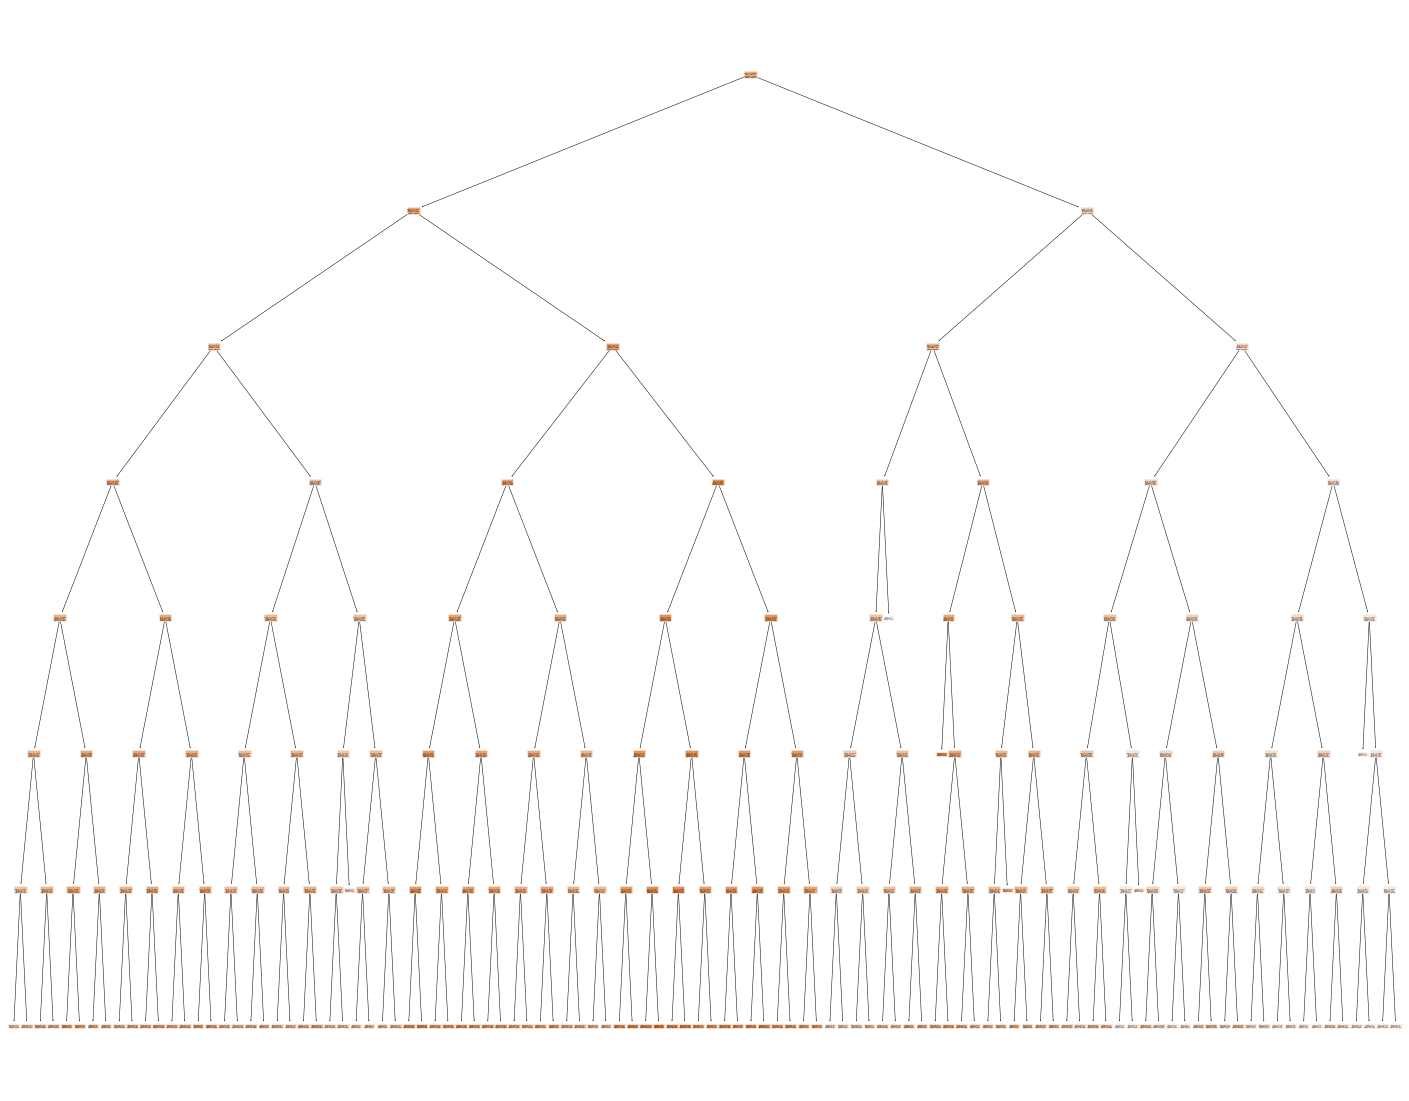

In [459]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dtree, filled = True)
plt.show()

## We have validated  KNN, Linear REgression , Ridge Regression , Lasso, LinearSVR, SVR with kernels- ploy, linear and Rb and decision tree. We observed that the best train and test score combination is for SVR rbf kernel with the training score of 0.9783 and a testing score of  0.9344. Uisng this we will be predicting y for X-test.

In [476]:
#We have validated  KNN, Linear REgression , Ridge Regression , Lasso, LinearSVR, SVR with kernels- ploy, linear and Rb and decision tree. We observed that the best train and test score combination is for SVR rbf kernel with the training score of 0.9783 and a testing score of  0.9344. Uisng this we will be predicting y for X-test.
y_pred =clf_rbf.predict(X_test)
print(y_pred)

[65.15466187 55.57860792 55.36209879 75.95877109 73.35793774 74.86773511
 56.69197918 56.30187675 69.70378306 72.30742533 73.81825156 74.10530846
 71.12873059 73.6563117  75.27239447 59.33601092 74.95789058 60.43658009
 56.3060759  68.91086093 73.6725521  62.25703118 75.64136689 70.44221018
 75.96666965 71.40137474 56.59160164 69.28541077 72.12561046 56.912391
 67.38241717 85.12849196 72.46520292 66.13920066 53.82214584 66.48647929
 52.06944622 73.71648326 77.02605514 71.90685374 52.84302731 73.33395004
 78.92026772 61.65778203 73.68696852 75.27164486 73.81072181 44.84197547
 78.07646185 73.92039832 80.84282043 67.16479931 75.14394921 62.27545414
 59.21002418 82.5052635  65.39716866 72.80913907 57.85485716 66.75089093
 79.88665495 82.28471814 46.16406684 74.07383035 75.78467934 50.16660147
 57.16872562 72.75398229 58.75627799 81.59763441 71.10266318 74.32951914
 67.94649567 73.19617154 74.68387772 64.73751846 74.39719413 66.22871859
 86.61736851 65.68550513 82.38938582 71.8884496  75.6

### Root Mean Square Error

In [480]:
#Root Mean square error
import math
from sklearn.metrics import mean_squared_error,r2_score
rmse= math.sqrt(mean_squared_error(y_pred,y_test))
print(rmse)

2.468709971255282


### R 2 score

In [481]:
print(r2_score(y_pred,y_test))

0.9322120445613167


# Project 1

### Dataset
For our Project we took two datasets and for Regression, we took the dataset of Life Expectancy from Kaggle.
There were two CSV files: Life Expectancy Data.csv and Country-Metadata.csv which we combined to create one dataset.

These are the insights of the combined dataset  pre processing

- There were total 22 columns in one dataset and 5 in other 
- There were 2939 instances (rows)
- There were 8 Categorical/ordinal columns.
- 5%-10% of the dataset was missing.

The dataset was huge. We imputed the dataset with median and mean after checking the skewness of the dataset. We visualized
the dataset using bar charts, histogram and pie charts.

### Cleaning Process:

The dataset was huge therefore, it took a lot of preprocessing. The values were imputed on the basis of mean and median after visualizing and checking the skewness. We imputed categorical/ordinal values on the basis of count. 
 

### Regression models:

We ran different types of Regression models such as:

#### K neighbours regressorsr:

- We ran Knn Regressor on Grid Search and the best parameters that we received {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
- we received the train and test scores as follows:
- Train score: 0.9665
- Test score: 0.9306

#### Linear regression using the Normal Equation:

- we received scores as follows:
- Train score: 0.8524
- Test score: 0.8521

#### Ridge:
- We ran Grid Search on Ridge and the best parameters that we received is  Ridge(alpha=0.01, solver='svd')

- Best cross-validation score: 0.78.
- we received the train and test scores as follows:
- Train score: 0.8523
- Test score: 0.8519

#### Lasso:
- We ran GridSearchCV on Lasso in order to find the best parameters. We received these as follows:
- Lasso(alpha=0.01)
- Train score: 0.1199
- Test score: 0.1204

#### Polynomial regression:
- The best scores are as follows:
- 0.9529279465799357
- 0.8454312648149785

#### LinearSVR :
- The best scores are as follows:
- Train score: 0.8669
- Test score: 0.8648

#### Poly SVR with kernels (rbf, poly, linear):

#### For RBF:
- Best parameters: {'C': 100, 'gamma': 1}
- Best cross-validation score: 0.93
- Train score: 0.9783
- Test score: 0.9344

#### For poly:
- Best parameters: {'C': 0.001, 'gamma': 10}
- Best cross-validation score: 0.87
- Train score: 0.9494
- Test score: 0.8971

#### For linear:
- Best parameters: {'C': 100, 'gamma': 0.001}
- Best cross-validation score: 0.84
- Train score: 0.8459
- Test score: 0.8488

#### Decision Tree Regressor :
We ran Grid Search on Decision Tree in order to find the maximum depth and best parameters
- {'criterion': 'mse', 'max_depth': 7}
- Accuracy on training set: 0.954
- Accuracy on test set: 0.911

We have validated KNN, Linear REgression , Ridge Regression , Lasso, LinearSVR, SVR with kernels- ploy, linear and Rb and decision tree. We observed that the best train and test score combination is for SVR rbf kernel with the training score of 0.9783 and a testing score of 0.9344. Uisng this we will be predicting y for X-test.

### R 2 score
- 0.9322120445613167

### RMSE
-2.468709971255282
